# Trees vs Support Vectors

Both these classification algorithms are powerful, but one might outperform the other based on the nature of the input data. Here are two illustrative examples.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import pandas as pd
import numpy as np
import random
import matplotlib.cm as cm

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Example 1: Diagonal decision boundary

We choose a 100 random points between (0,1) in two dimensions.  Classification labels are given as 0 or 1 based on points being above or below the diagonal line.

In [7]:
# def visualize(X, y, bdry='diag'):
#     c = cm.rainbow(np.linspace(0, 1, 2))
#     plt.scatter([i[0] for i in X], [i[1] for i in X], color=[c[i] for i in y], alpha=.5)
    
#     #Plot the true decision boundary
#     if bdry == 'diag':
#         plt.plot([0, 1], [0, 1], 'k--')
#     elif bdry == 'quadrant':
#         plt.plot([0, 1], [0.5, 0.5], 'k--')
#         plt.plot([0.5, 0.5], [0, 1], 'k--')
        
#     plt.grid(True)
    

# visualize(X, y)

>**QUESTION:** Based on code above, which labels do red and purple have?

The above data are diagonally separable. A linear SVC model can nail this situation, as seen below.

First we will define a few helper functions to run some quick simulations.

In [8]:
X = pd.read_pickle('/Users/ridwan/Documents/DataScience/Metis/Metis_Projects/Data/flights/df_X.pickle')
y = pd.read_pickle('/Users/ridwan/Documents/DataScience/Metis/Metis_Projects/Data/flights/df_y.pickle')

In [9]:
def quick_test(model, X, y):
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)
    model.fit(xtrain, ytrain)
    return model.score(xtest, ytest)

def quick_test_afew_times(model, X, y, n=10):
    return np.mean([quick_test(model, X, y) for j in range(n)])

In [10]:
linearsvc = LinearSVC()

# Do the test 10 times with a LinearSVC and get the average score
# do I do it on X_train_scaled and y_train??
quick_test_afew_times(linearsvc, X, y)

0.6086128428927681

> **QUESTION:** Why didn't we get 100% accuracy?

But these diagonally separable data turn out to be a tough problem for a decision tree. It will easily overfit the data and won't do as well as the SVC.

In [9]:
decisiontree = DecisionTreeClassifier(max_depth=4)
quick_test_afew_times(decisiontree, X, y)

0.6750218204488778

Random forest is likely an improvement, but still not quite as good as the linear SVC.

In [11]:
randomforest = RandomForestClassifier(n_estimators=100, max_depth=7)
quick_test_afew_times(randomforest, X, y)

0.7036471321695761

#### Example 1: Decision Boundary

Taking a closer look at the decision boundary, we see that the decision tree is having a hard time because it can only subdivide the space into rectanuglar regions.

In [11]:
decisiontree.fit(X, y)

grid = np.mgrid[0:1.02:0.02, 0:1.02:0.02].reshape(2,-1).T
visualize(grid, decisiontree.predict(grid))

NameError: name 'visualize' is not defined

But the linear SVC makes any _linear_ decision boundary we want.

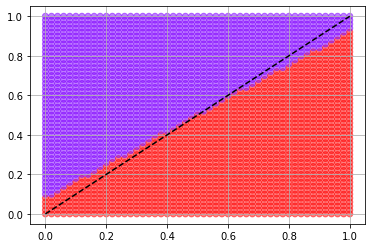

In [9]:
linearsvc.fit(X, y1)

grid = np.mgrid[0:1.02:0.02, 0:1.02:0.02].reshape(2,-1).T
visualize(grid, linearsvc.predict(grid))

### Example 2: Quadrant decision boundary
Now we will try a different categorization. Put an orthogonal axis in the middle of the x- and y-values to make a quadrant-style decision boundary.

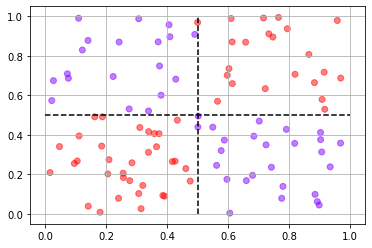

In [13]:
y2 = [1 if (0.5-i[0])*(0.5-i[1])>0 else 0 for i in X]
visualize(X, y2, bdry='quadrant')

Now linear SVC really struggles because the data isn't linearly seperable.

In [14]:
linearsvc = LinearSVC()
quick_test_afew_times(linearsvc, X, y2)

0.5433333333333332

A polynomal kernel may do a bit better but still won't do well.

In [15]:
svc = SVC(kernel='poly', gamma='auto')
quick_test_afew_times(svc, X, y2)

0.51

Decision trees, on the other hand, thrive on this data.

In [16]:
decisiontree = DecisionTreeClassifier()
quick_test_afew_times(decisiontree, X, y2)

0.9400000000000001

#### Example 2: Decision Boundary

From the decision boundaries of each model make it abundantly clear: trees are able to segment according to the quadrants to make local predicitons while the SVCs make global decisions.

In [15]:
#need to reshape grid 

decisiontree.fit(X, y)

grid = np.mgrid[0:1.02:0.02, 0:1.02:0.02].reshape(2,-1).T
visualize(grid, decisiontree.predict(grid), bdry='quadrant')

In [18]:
linearsvc.fit(X, y)

grid = np.mgrid[0:1.02:0.02, 0:1.02:0.02].reshape(2,-1).T
visualize(grid, linearsvc.predict(grid), bdry='quadrant')

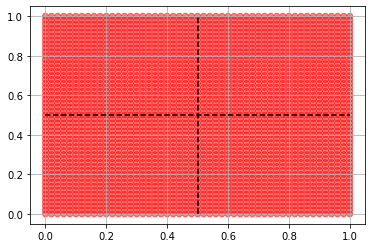

In [19]:
#Polynomial kernal
svc.fit(X, y2)

grid = np.mgrid[0:1.02:0.02, 0:1.02:0.02].reshape(2,-1).T
visualize(grid, svc.predict(grid), bdry='quadrant')

### Recap

Here we looked at two simple problems: 
- The linear SVC and decision tree models each solved a different one perfectly but struggled with the other. 
- When they struggled, sophistications like non-linear kernels and random forests helped, but still couldn't reach perfection.
- **It's easy to throw your data into a bunch of algorithms and see which one does best.  But gaining some intuition for your data and your models is worth the time and effort!**